In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_d= pd.read_csv('spam_ham_dataset.csv')
raw_d.head()

FileNotFoundError: ignored

In [ ]:
raw_d = raw_d.drop('Unnamed: 0', axis=1)


In [ ]:
raw_d.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
subjects = []
for i in range(len(raw_d)):
    ln =raw_d["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject:" , "")
    subjects.append(line)

In [ ]:
raw_d['Subject'] = subjects

In [ ]:
data1= raw_d.copy()


In [ ]:
data1.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
 3   Subject    5171 non-null   object
dtypes: int64(1), object(3)
memory usage: 161.7+ KB


In [ ]:
data1.duplicated().sum()

178

In [ ]:
data1=data1.drop_duplicates(keep='first')

In [ ]:
data1.shape

(4993, 4)

# EDA


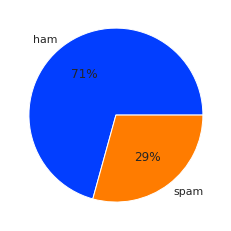

In [ ]:
palette_color = sns.color_palette('bright')
s= data1['label'].value_counts()
# plotting data on chart
plt.pie(s,data= data1, labels=s.index, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data1['len_alphabets']= data1['Subject'].apply(len)

In [ ]:
data1['len_words']= data1['Subject'].apply(lambda x:len(nltk.word_tokenize(x)))
data1['len_words']

0        7
1        7
2        2
3       10
4        4
        ..
5165    18
5166     6
5167     8
5169     6
5170     4
Name: len_words, Length: 4993, dtype: int64

In [ ]:
data1['len_sent']= data1['Subject'].apply(lambda x:len(nltk.sent_tokenize(x)))
data1['len_sent']

0       1
1       1
2       1
3       3
4       1
       ..
5165    2
5166    1
5167    1
5169    1
5170    1
Name: len_sent, Length: 4993, dtype: int64

In [ ]:
data1.head()

,label,text,label_num,Subject,len_alphabets,len_words,len_sent
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter # : 988291,34,7,1
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001",29,7,1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat,13,2,1
3,spam,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t...",53,10,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs,20,4,1


# For Ham


In [ ]:
data1[data1['label_num']==0][['len_alphabets','len_words','len_sent']].describe()

,len_alphabets,len_words,len_sent
count,3531.000000,3531.000000,3531.000000
mean,32.018692,6.728972,1.061456
std,16.757720,4.135099,0.320969
min,3.000000,1.000000,1.000000
25%,20.000000,4.000000,1.000000
50%,29.000000,6.000000,1.000000
75%,41.000000,9.000000,1.000000
max,332.000000,71.000000,6.000000


# For Spam

In [ ]:
data1[data1['label_num']==1][['len_alphabets','len_words','len_sent']].describe()

,len_alphabets,len_words,len_sent
count,1462.000000,1462.000000,1462.000000
mean,41.443228,8.657319,1.298906
std,117.983760,22.922799,1.170706
min,1.000000,0.000000,0.000000
25%,21.000000,4.000000,1.000000
50%,33.000000,6.000000,1.000000
75%,47.000000,10.000000,1.000000
max,3154.000000,602.000000,22.000000


<AxesSubplot:xlabel='len_alphabets', ylabel='Count'>

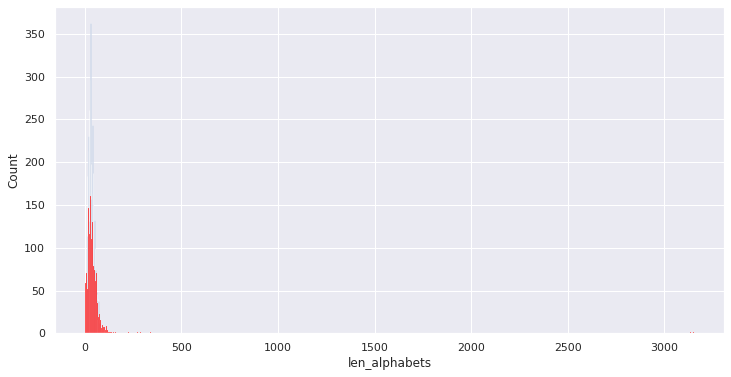

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data1[data1['label_num']==0]['len_alphabets'])
sns.histplot(data1[data1['label_num']==1]['len_alphabets'],color='red')

<AxesSubplot:xlabel='len_words', ylabel='Count'>

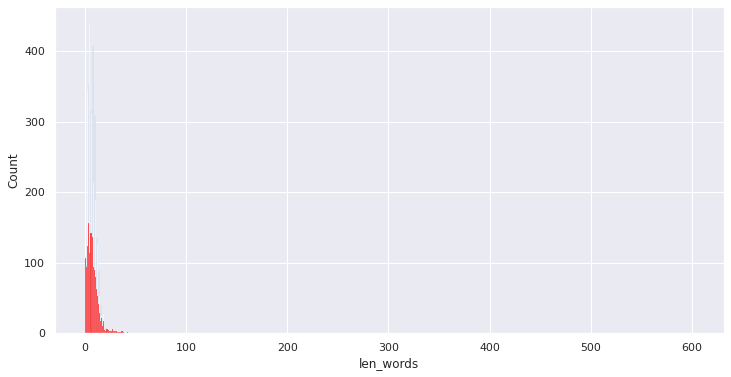

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data1[data1['label_num']==0]['len_words'])
sns.histplot(data1[data1['label_num']==1]['len_words'],color='red')

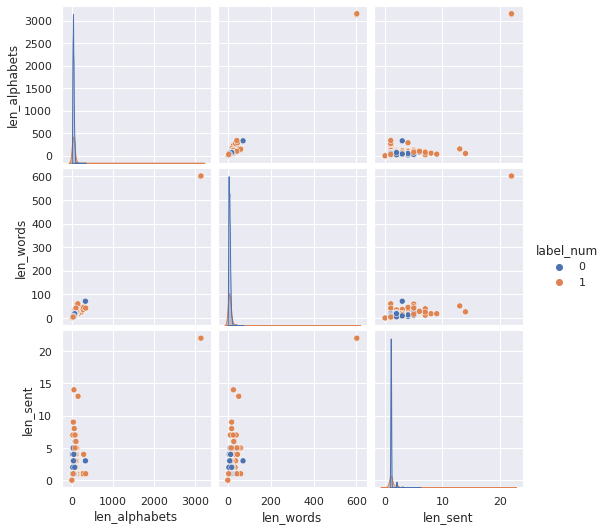

In [ ]:
sns.pairplot(data1,hue='label_num')

<AxesSubplot:>

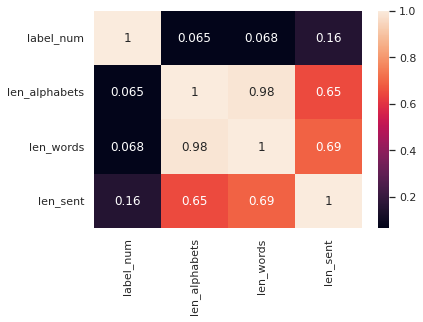

In [ ]:
sns.heatmap(data1.corr(),annot=True)

# DATA PREPROCESSING

1. All Lower case
2. Tokenization
3. No special characters
4. Removing stop words/punctuation
5. Stemming

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


In [ ]:
data1['transformed_text']=data1['Subject'].apply(transform_text)

In [ ]:
data1.head()

,label,text,label_num,Subject,len_alphabets,len_words,len_sent,transformed_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter # : 988291,34,7,1,enron methanol meter 988291
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001",29,7,1,hpl nom januari 9 2001
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat,13,2,1,neon retreat
3,spam,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main t...",53,10,3,photoshop window offic cheap main trend
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs,20,4,1,indian spring


# Generating Word cloud


In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width =2000, height=2000,min_font_size=10, background_color='white')

In [ ]:
spam_wc= wc.generate(data1[data1['label']=='spam']['transformed_text'].str.cat(sep=" "))

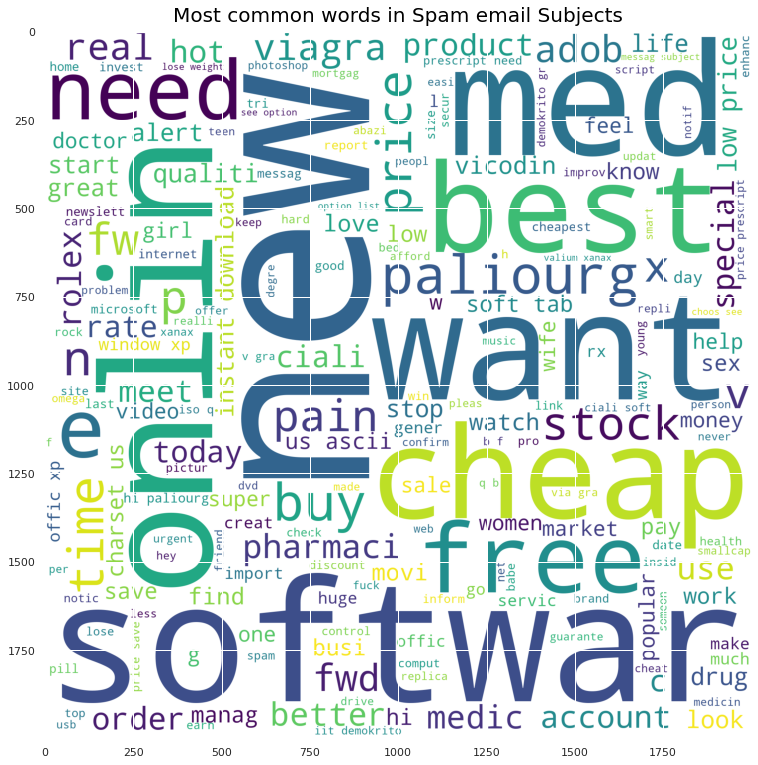

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Subjects", fontdict={'size': 20, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.imshow(spam_wc)

In [ ]:
ham_wc= wc.generate(data1[data1['label']=='ham']['transformed_text'].str.cat(sep=" "))

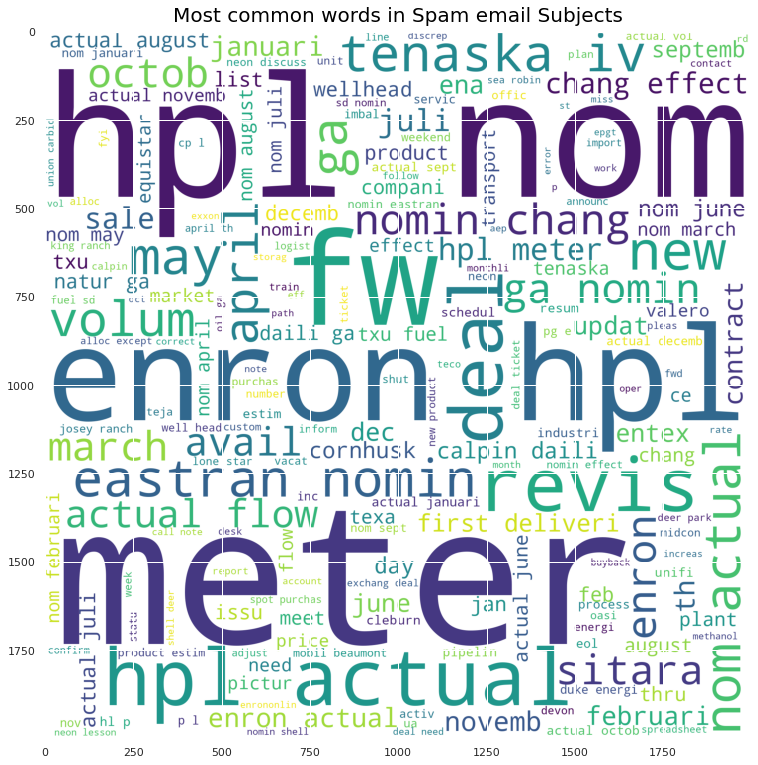

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("Most common words in Spam email Subjects", fontdict={'size': 20, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.imshow(ham_wc)